# Credit Card Fraud Detection with Imbalanced Data: Undersampling vs. Oversampling (Undersampling Notebook)

### Goal
Credit card fraud detection using labeled data is one of the main basic projects used while learning about data science, machine learning, and binary classifiers. In this notebook, I am less focused on building simple classification models to detect fraud, and instead, I am curious to test the difference between oversampling and undersampling techniques and their outcomes when applied to highly-imbalanced data, like the dataset used here. Utilizing the Imbalanced-Learn library, my goal is to find which of the two sampling techniques is more useful in highly imbalanced data, and how each affects the accuracy.

***This project has been broken into 3 notebooks, as one notebook exceeds the file size limit for Github.***

### Data Source
The original dataset can be found [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) <br> 
**Notes from data source:** "It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise." <br> 

In addition, the publisher recommended to not use confusion matrices due to the high imbalance in target variable, however I will utilize them in this notebook because I am comparing methods to create balanced data. 

In [5]:
#import dependencies
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
#import classification dependencies
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics  import (f1_score,accuracy_score, recall_score, precision_score, confusion_matrix)
from imblearn.under_sampling import NearMiss


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [6]:
#import data 
credit_data = pd.read_csv('creditcard.csv')

## Undersampling 
There are several undersampling techniques that can be used. For this notebook, I will be using **Near Miss Undersampling**. There are 3 versions of NearMiss, and for the purpose of this notebook, I will be using Version 3, as described below: <br> 
***Version 3 of the Near Miss Undersampling keeps an example from the majority class for each closest record of the minority class. It should result in an increased accuracy, as it takes into consideration the  majority class values near the decision boundary***

In [7]:
#create NearMiss object:
nm = NearMiss(version = 3)
#fit the data:
X_nm, y_nm = nm.fit_resample(credit_data.drop('Class', axis=1), credit_data['Class'])
#concat the new X and y values to a new dataframe:
nm_df = pd.concat([pd.DataFrame(y_nm), pd.DataFrame(X_nm)], axis=1)

#check the shape:
nm_df.shape

(984, 31)

In [8]:
nm_fraud = len(nm_df[nm_df['Class'] == 1])
nm_nonfraud = len(nm_df[nm_df['Class'] == 0])
print('In the dataset created with Near Miss Undersampling, there are: ')
print(f'{str(nm_fraud)} fraud transactions')
print(f'{str(nm_nonfraud)} non-fraud transactions')


In the dataset created with Near Miss Undersampling, there are: 
492 fraud transactions
492 non-fraud transactions


That is quite a large difference in amount data compared to the original! As seen with oversampling, undersampling also makes it so the amount of data in each class matches. In undersampling, this means removing majority class data until the amount equals the amount of the minority class, whereas oversampling means creating synthetic data to add to the minority class, so that the amount of the minority class equals that of the majority class. 

Now that I have the new dataset, I will do the same as I did with the oversampling data and apply multiple classification models to the dataset. 

**Because I have a small amount of data, I will not create a cross-validation dataset, to ensure my model has enough data in the training set**

In [9]:
#train_test_split: 
nm_copy = nm_df.copy()
y_nm = nm_copy['Class']
X_nm = nm_copy.drop('Class', axis = 1)

X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size = 0.3, train_size = 0.7)


In [11]:
# Random Forest Classifier
RAND_STATE = 42
rfc_nm = RandomForestClassifier(random_state = RAND_STATE)
rfc_nm.fit(X_train_nm, y_train_nm)
rfc_nm_pred = rfc_nm.predict(X_test_nm)

#accuracy score
rfc_nm_acc = accuracy_score(rfc_nm_pred, y_test_nm)

#precision: 
rfc_nm_prec = precision_score(rfc_nm_pred, y_test_nm)
#recall:
rfc_nm_rec = recall_score(rfc_nm_pred, y_test_nm)

print('Random Forest Classifier')
print(f'Accuracy Score: {str(rfc_nm_acc)}')
print(f'Precision Score: {str(rfc_nm_prec)}')
print(f'Recall Score: {str(rfc_nm_rec)}')

Random Forest Classifier
Accuracy Score: 0.9155405405405406
Precision Score: 0.8670886075949367
Recall Score: 0.9716312056737588


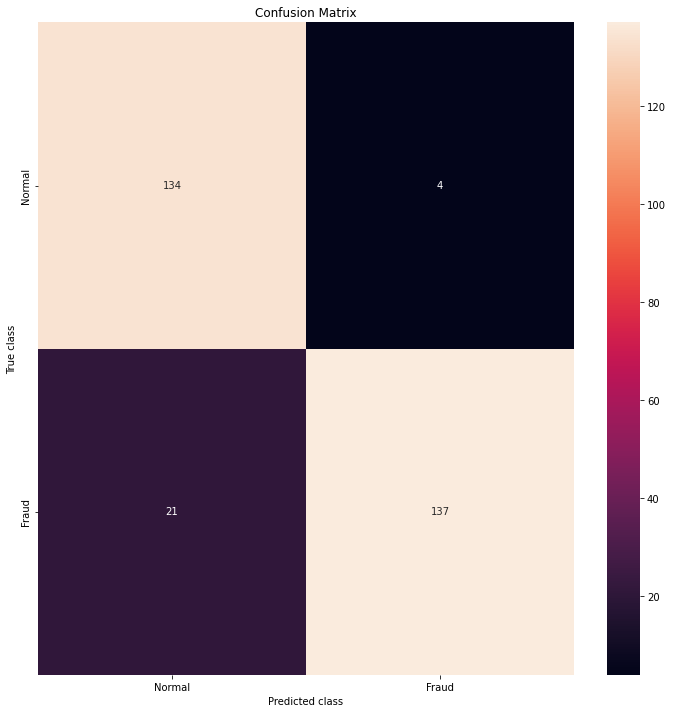

In [13]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test_nm, rfc_nm_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [14]:
# Decision Tree

dtc_nm = DecisionTreeClassifier(random_state = RAND_STATE)
dtc_nm.fit(X_train_nm, y_train_nm)
dtc_nm_pred = dtc_nm.predict(X_test_nm)

#accuracy score
dtc_nm_acc = accuracy_score(dtc_nm_pred, y_test_nm)

#precision: 
dtc_nm_prec = precision_score(dtc_nm_pred, y_test_nm)
#recall:
dtc_nm_rec = recall_score(dtc_nm_pred, y_test_nm)

print('Decision Tree Classifier')
print(f'Accuracy Score: {str(dtc_nm_acc)}')
print(f'Precision Score: {str(dtc_nm_prec)}')
print(f'Recall Score: {str(dtc_nm_rec)}')

Decision Tree Classifier
Accuracy Score: 0.8986486486486487
Precision Score: 0.8860759493670886
Recall Score: 0.9210526315789473


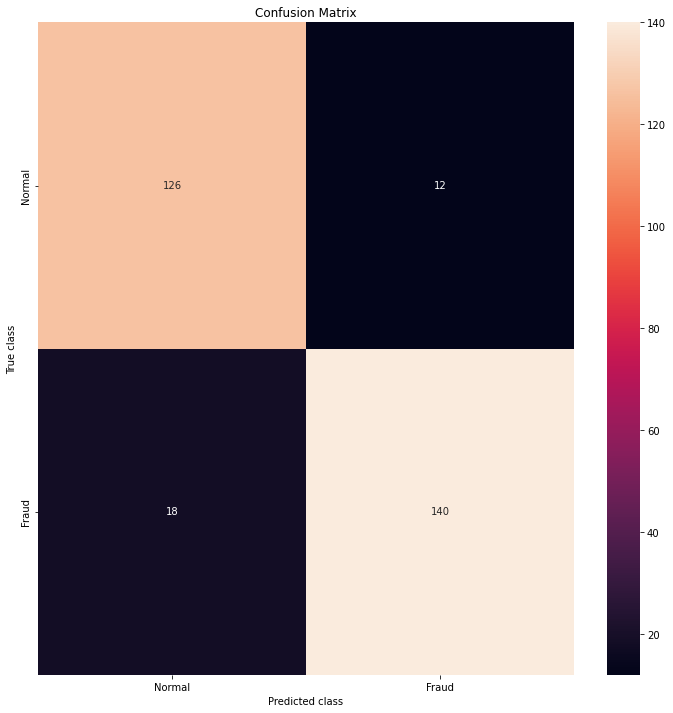

In [15]:
conf_matrix = confusion_matrix(y_test_nm, dtc_nm_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [16]:
# Logistic Regression

lr_nm = LogisticRegression(solver='lbfgs', max_iter= 1000, random_state = RAND_STATE)
lr_nm.fit(X_train_nm, y_train_nm)
lr_nm_pred = lr_nm.predict(X_test_nm)

#accuracy score
lr_nm_acc = accuracy_score(lr_nm_pred, y_test_nm)

#precision: 
lr_nm_prec = precision_score(lr_nm_pred, y_test_nm)
#recall:
lr_nm_rec = recall_score(lr_nm_pred, y_test_nm)

print('Logistic Regression')
print(f'Accuracy Score: {str(lr_nm_acc)}')
print(f'Precision Score: {str(lr_nm_prec)}')
print(f'Recall Score: {str(lr_nm_rec)}')

Logistic Regression
Accuracy Score: 0.918918918918919
Precision Score: 0.8860759493670886
Recall Score: 0.958904109589041


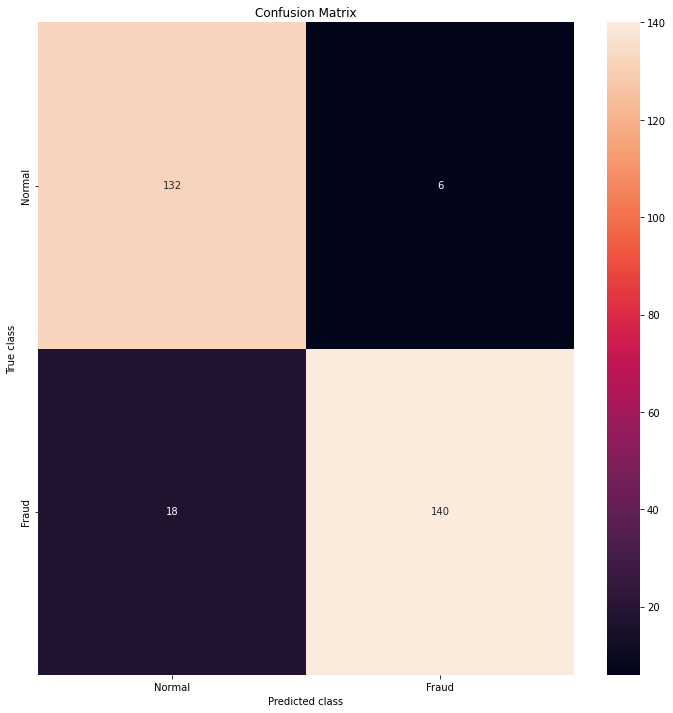

In [17]:
conf_matrix = confusion_matrix(y_test_nm, lr_nm_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [18]:
# K-Nearest Neighbors
kn_nm = KNeighborsClassifier()
kn_nm.fit(X_train_nm, y_train_nm)
kn_nm_pred = kn_nm.predict(X_test_nm)

#accuracy score
kn_nm_acc = accuracy_score(kn_nm_pred, y_test_nm)

#precision: 
kn_nm_prec = precision_score(kn_nm_pred, y_test_nm)
#recall:
kn_nm_rec = recall_score(kn_nm_pred, y_test_nm)

print('K-Nearest Neighbors')
print(f'Accuracy Score: {str(kn_nm_acc)}')
print(f'Precision Score: {str(kn_nm_prec)}')
print(f'Recall Score: {str(kn_nm_rec)}')

K-Nearest Neighbors
Accuracy Score: 0.6114864864864865
Precision Score: 0.620253164556962
Recall Score: 0.6405228758169934


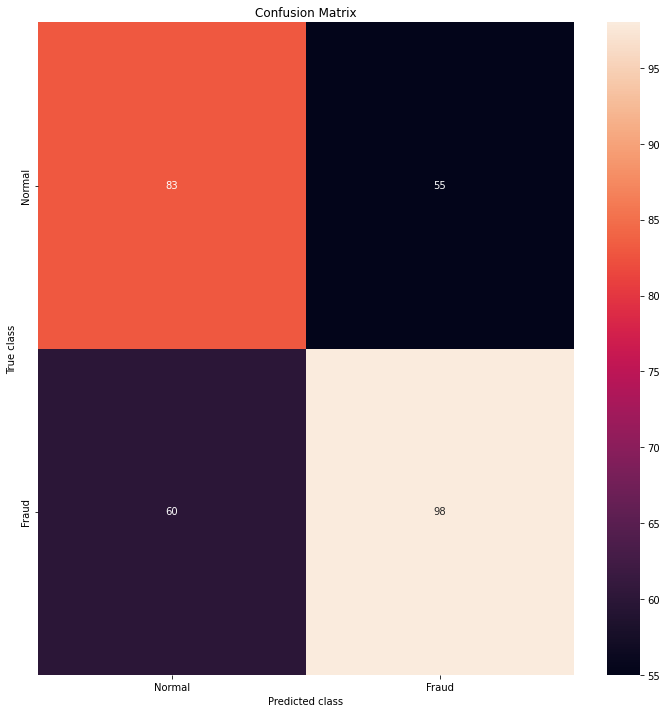

In [19]:
conf_matrix = confusion_matrix(y_test_nm, kn_nm_pred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Results and Oversampling vs Undersampling Comparison 

### Results
As seen in the classifiers created, Random Forest Classifier did the best overall in both the undersampling and oversampling examples. K-Nearest Neighbors seems to have taken a more dramatic decrease in accuracy, precision, and recall with undersampling. 

### Oversampling vs Undersampling 
Undersampling and Oversmapling both have certain pros and cons, mainly due to the amount of data. In particular, Oversampling leads to a vast amount of data for use, which does lead to higher accuracy. However, the larger amount of data, the higher amount of computing power needed for the models to run efficiently. If not enough computing power is available, the models will take a long time to run. Undersampling, on the otherhand, significantly decreased the amount of data, and allowed for a faster runtime for all models. However, there was also a dramatic decrease in accuracy/precision/recall. From this notebook, it seems that undersampling would be best used if a project can sacrifice a bit of accuracy for an increased run time, and oversampling would be best where a large amount of data can be handled, so that the project can have the higher accuracy. 